# House Prices

## 1. Business understanding

### Modelo Conceitual

Introdução:
Neste trabalho foi utilizado técnicas de rede neurais para prever o preço das casas através da base de dados house_prices. No campo da inteligência artificial, as redes neurais vêm desempenhando um papel fundamental na resolução de problemas complexos, tendo a vantagem de aprendizagem de padrões complexos e de lidar com relações não lineares.
A determinação do preço das casas é influenciada por uma série de fatores que refletem tanto as características físicas da propriedade quanto o contexto do mercado imobiliário. <p>
A localização Geográfica (proximidade de centros urbanos, de escolas, acessibilidade a serviços e comodidades), tamanho e Layout da Casa (área construída, número de quartos, banheiros e andares), estado de conservação, idade da propriedade, possuir ou não piscina, jardins, varandas, garagem, e outros recursos especiais e a qualidade dos acabamentos influenciam o preço das propriedades. <p>
Além das características do imóvel, a dinâmica do mercado imobiliário também pode influenciar no preço, as condições do Mercado Imobiliário ( oferta e demanda no mercado imobiliário local), tendências econômicas, como taxas de juros, inflação e condições gerais do mercado imobiliário, podem impactar os preços.



Implementação: <p>
1) Objetivos:
Construir um modelo para prever o preço das casas usando o conjunto de dados de treinamento e então avaliar seu desempenho no conjunto de dados de teste.

2) Tarefas
Pré-processamento de Dados
Verificar existência de dados faltantes, e efetuar o tratamento, se necessário.
Codificar variáveis categóricas
Garantir que todas as variáveis estejam na mesma escala para facilitar o treinamento da rede neural, atraves de padronização.

Divisão dos dados
Os dados já se encontram previamente divididos em treino e teste



## 2. Data understanding and preparation

### Analisando variáveis

In [124]:
# Importação das bibliotecas
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder


import os
import sys
#import re
import time
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline


import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary
%load_ext tensorboard

from google.protobuf import struct_pb2


import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # show only two digits
pd.set_option('display.max_columns', 100) # show up to 100 columns
np.random.seed(2023)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Iniciou-se com a importação das bases de treino ('train') e teste ('test')

In [125]:
train = pd.read_csv('train.csv')


In [126]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Verificando o tamanho das bases

In [127]:
print(train.shape)


(1460, 81)


Utilizando a coluna Id como índice

In [128]:
train.set_index("Id", inplace=True)


Verificar se há linhas duplicadas

In [129]:
linhas_duplicadas = train[train.duplicated()]

if len(linhas_duplicadas) > 0:
    print("Linhas duplicadas encontradas:")
    print(linhas_duplicadas)
else:
    print("Não há linhas duplicadas no DataFrame.")

# Remover linhas duplicadas
#df_sem_duplicatas = df.drop_duplicates()


Não há linhas duplicadas no DataFrame.


Vamos olhar as informações iniciais da base treino, para verificar tipo de variáveis e valores faltantes

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [131]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


Nossa base possui 1460 instancias e 80 categorias, sendo que 38 são numéricas e 43 categóricas.

Alguns atributos possuem valores NA, que significa que não possuem o atributo, mas o python assumiu como dados faltantes, então vamos imputar o valo "None" nas variáveis categóricas e zero nas variáveis numéricas. Faremos essa operação na base treino e na base teste, tomando o cuidado de utilizar a mediana calculada na base treino, na base de teste.

In [132]:
# Calculando a mediana nas variáveis numéricas na base de treino
median_values = train.select_dtypes(exclude=['object']).median()

# Imputando a mediana nas variáveis numéricas em train, mantendo o índice
dados_numerical = train.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em train, mantendo o índice
dados_categoric = train.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados, garantindo a ordem original das linhas
# Aqui, você não precisa fazer um merge já que você está tratando separadamente e quer combinar de volta
train = pd.concat([dados_numerical, dados_categoric], axis=1)

# Imputando a mediana nas variáveis numéricas em test com a mediana de train
#dados_numerical_test = test.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em test, mantendo o índice
#dados_categoric_test = test.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados de test, garantindo a ordem original das linhas
#test = pd.concat([dados_numerical_test, dados_categoric_test], axis=1)


In [133]:
# a variável MSSubClass aparece como int, mas é categ+orica
train['MSSubClass'] = train['MSSubClass'].astype(str)
#test['MSSubClass'] = test['MSSubClass'].astype(str)



Das 80 variáveis, vamos selecionar as que acreditamos poder influenciar o preço dos imóveis de acordo com nosso modelo conceitual. Selecionamos inicialmente 52 variáveis, além da variável target 'sale_price'

In [134]:

variaveis = ("MSSubClass", "LotArea", "LotShape", "LandContour", "LotConfig", "LandSlope", "BldgType", "1stFlrSF", "2ndFlrSF", "BedroomAbvGr", "FullBath", "HalfBath", "Kitchen", "TotRmsAbvGrd", "Heating", "Electrical", "Utilities", "CentralAir", "YrSold", "SaleType", "SaleCondition", "MSZoning", "Neighborhood", "Condition1", "Condition2", "YearBuilt", "YearRemodAdd", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "HouseStyle", "KitchenQual", "BsmtQual", "BsmtCond", "HeatingQC", "FireplaceQu", "Functional", "GarageType", "GarageFinish", "GarageArea", "PoolArea", "Fence", "MiscFeature", "Fireplaces", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "SalePrice")

dados_train = train[list(filter(lambda x: x in train.columns, variaveis))]


In [135]:
train, test = train_test_split(dados_train, test_size=0.2, random_state=2024)

In [136]:
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1168, 51)
Test dataset shape: (292, 51)


Em seguida, faremos uma análisa das variáveis, para definir quais entrarão no nosso modelo

#### Análise univariada

In [137]:
train.tail()

,MSSubClass,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,Heating,Electrical,Utilities,CentralAir,YrSold,SaleType,SaleCondition,MSZoning,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,OverallQual,OverallCond,ExterQual,ExterCond,HouseStyle,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional,GarageType,GarageFinish,GarageArea,PoolArea,Fence,MiscFeature,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
184,50,11426,Reg,Lvl,Inside,Gtl,1Fam,1362,720,3,2,1,6,GasA,SBrkr,AllPub,Y,2008,WD,Normal,RM,OldTown,Norm,Norm,2003,2003,7,5,TA,TA,1.5Fin,Gd,Gd,TA,Ex,NONE,Mod,Detchd,Unf,484,0,NONE,NONE,0,1362,280,238,0,0,0,200000
447,20,16492,IR1,Lvl,Corner,Gtl,1Fam,1888,0,2,2,1,6,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,NAmes,PosA,Norm,1966,2002,6,6,Gd,TA,1Story,Gd,TA,TA,Ex,Gd,Mod,Attchd,Fin,578,0,NONE,NONE,1,1517,0,0,0,0,0,190000
540,20,11423,Reg,Lvl,Inside,Gtl,1Fam,1601,0,3,2,0,6,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,CollgCr,Norm,Norm,2001,2002,8,5,Gd,TA,1Story,Gd,Gd,TA,Ex,TA,Typ,Attchd,RFn,670,0,MnPrv,Shed,1,1581,180,0,0,0,0,272000
641,120,12677,IR1,Lvl,Inside,Gtl,TwnhsE,1518,0,1,1,1,6,GasA,SBrkr,AllPub,Y,2008,WD,Normal,RL,NridgHt,Norm,Norm,2003,2004,8,5,Ex,TA,1Story,Ex,Ex,TA,Ex,Gd,Typ,Attchd,RFn,588,0,NONE,NONE,1,1518,185,140,0,0,0,274000
609,70,12168,Reg,HLS,Inside,Mod,1Fam,1940,1254,4,2,1,10,GasA,SBrkr,AllPub,Y,2007,WD,Alloca,RL,Crawfor,Norm,Norm,1934,1998,8,6,TA,TA,2Story,TA,Gd,TA,TA,Gd,Typ,Basment,Unf,380,0,NONE,NONE,2,965,0,0,0,0,0,359100


In [138]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [139]:
train['CentralAir'] = train['CentralAir'].replace({'Y': 1, 'N': 0})
test['CentralAir'] = test['CentralAir'].replace({'Y': 1, 'N': 0})

In [140]:
cols = train.columns

Vamos separar as variáveis numéricas, categóricas ordinais e categóricas nominais para tratar adequadamenete

In [141]:
categoricas_nominais= ['MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'Functional', 'GarageType', 'GarageFinish',
'SaleType', 'SaleCondition','BldgType', 'Heating','Electrical', 'MSZoning',"MiscFeature",'YrSold','YearBuilt', 'YearRemodAdd', 'KitchenQual','BsmtQual','BsmtCond','HeatingQC','FireplaceQu','Fence']

In [142]:
from category_encoders.one_hot import OneHotEncoder
enc = OneHotEncoder(cols=['MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'Functional', 'GarageType', 'GarageFinish',
'SaleType', 'SaleCondition','BldgType', 'Heating','Electrical', 'MSZoning',"MiscFeature",'YrSold','YearBuilt', 'YearRemodAdd','KitchenQual','BsmtQual','BsmtCond','HeatingQC','FireplaceQu','Fence'], use_cat_names=True)
enc.fit(train)

OneHotEncoder(cols=['MSSubClass', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                    'Condition2', 'HouseStyle', 'Functional', 'GarageType',
                    'GarageFinish', 'SaleType', 'SaleCondition', 'BldgType',
                    'Heating', 'Electrical', 'MSZoning', 'MiscFeature',
                    'YrSold', 'YearBuilt', 'YearRemodAdd', 'KitchenQual',
                    'BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu',
                    'Fence'],
              use_cat_names=True)

In [143]:
train_ohe= enc.transform(train)

In [144]:
train_ohe.index = range(1, len(train)+1)

In [145]:
test_ohe= enc.transform(test)

In [146]:
test_ohe.index = range(1, len(test)+1)

In [147]:
train_ohe.head()

,MSSubClass_20,MSSubClass_90,MSSubClass_50,MSSubClass_120,MSSubClass_60,MSSubClass_80,MSSubClass_160,MSSubClass_75,MSSubClass_70,MSSubClass_30,MSSubClass_85,MSSubClass_190,MSSubClass_45,MSSubClass_180,MSSubClass_40,LotArea,LotShape_IR1,LotShape_Reg,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Inside,LotConfig_Corner,LotConfig_FR2,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,BldgType_2fmCon,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,Heating_GasA,Heating_Wall,Heating_Grav,Heating_GasW,Heating_OthW,Electrical_SBrkr,Electrical_FuseA,...,BsmtCond_Po,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Po,FireplaceQu_NONE,FireplaceQu_TA,FireplaceQu_Po,FireplaceQu_Gd,FireplaceQu_Fa,FireplaceQu_Ex,Functional_Typ,Functional_Maj1,Functional_Mod,Functional_Min2,Functional_Min1,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_NONE,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageFinish_Unf,GarageFinish_NONE,GarageFinish_Fin,GarageFinish_RFn,GarageArea,PoolArea,Fence_NONE,Fence_MnPrv,Fence_GdWo,Fence_GdPrv,Fence_MnWw,MiscFeature_NONE,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7390,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1098,0,3,1,0,6,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,260,0,1,0,0,0,0,1,0,0,0,0,0,1098,0,0,0,0,0,135000
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10800,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1200,0,3,3,0,5,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1200,120,0,0,0,0,179000
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13811,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1137,0,2,2,0,5,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,551,0,1,0,0,0,0,1,0,0,0,0,1,1112,125,0,0,0,0,176000
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12030,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1694,0,3,2,0,7,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,818,0,1,0,0,0,0,1,0,0,0,0,0,1694,168,228,0,0,0,318000
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8064,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,672,252,3,1,0,6,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,576,0,0,1,0,0,0,0,1,0,0,0,1,672,0,0,0,0,0,122900


In [148]:
train_ohe.shape

(1168, 371)

In [149]:
test_ohe.shape

(292, 371)

In [150]:
categoricas_ordinais1 = ['OverallQual', 'OverallCond']
categoricas_ordinais2 = ['ExterQual', 'ExterCond',  'KitchenQual' ]
#categoricas_ordinais3 = ['YrSold','YearBuilt', 'YearRemodAdd']


In [151]:
colunas_numericas = train.drop(columns=categoricas_nominais + categoricas_ordinais1 + categoricas_ordinais2).columns
df_numericos = train[colunas_numericas]
colunas_numericas

Index(['LotArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'CentralAir', 'GarageArea', 'PoolArea',
       'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

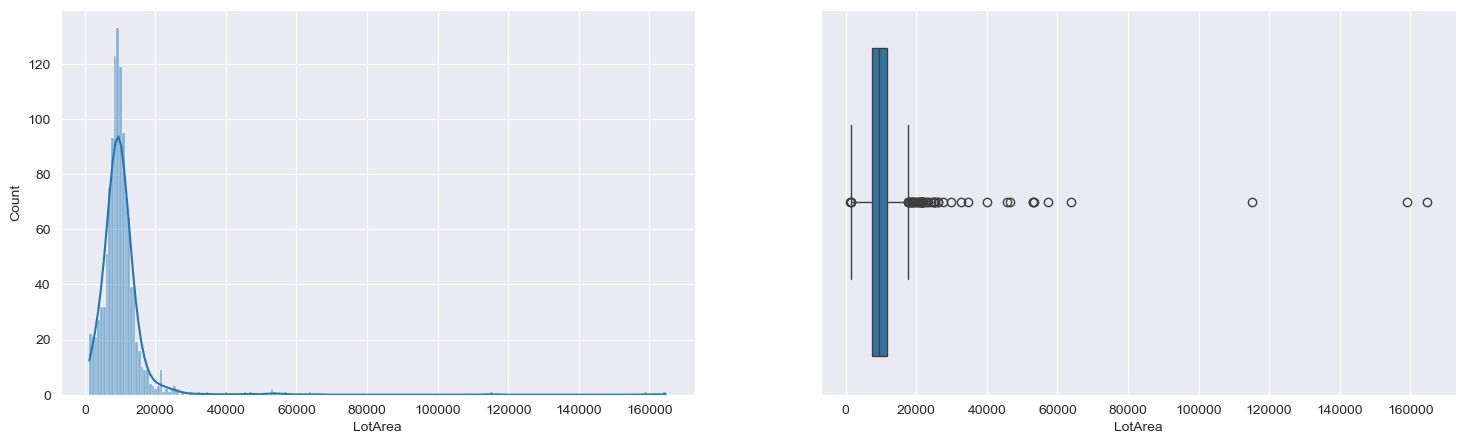

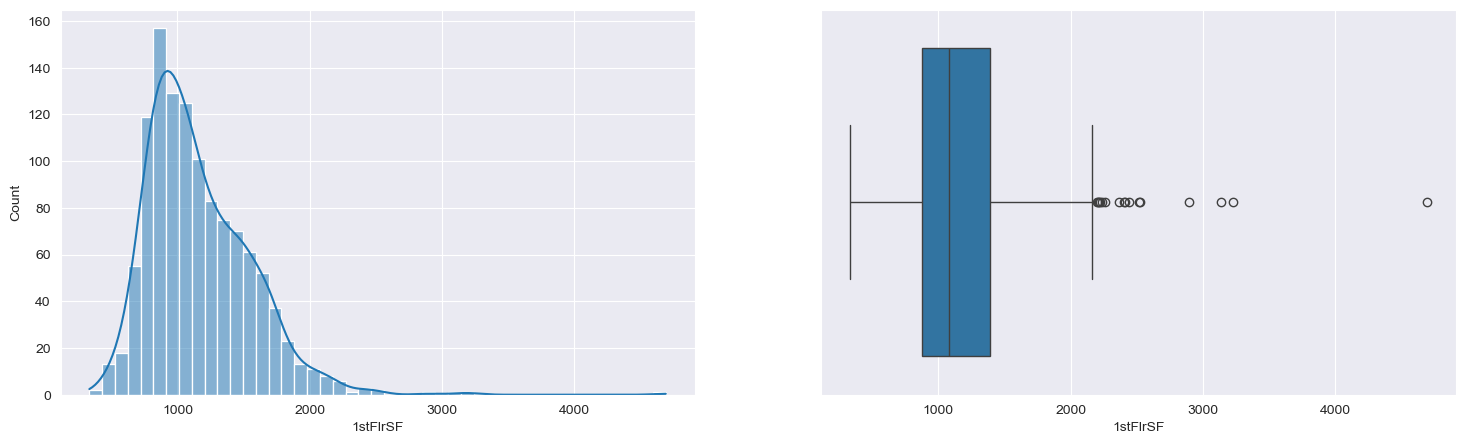

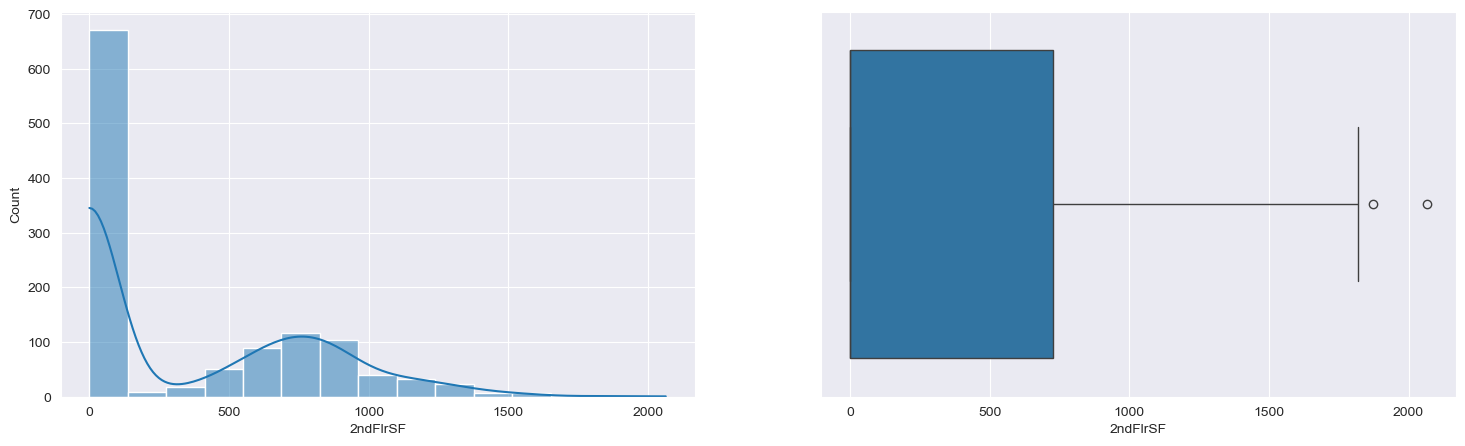

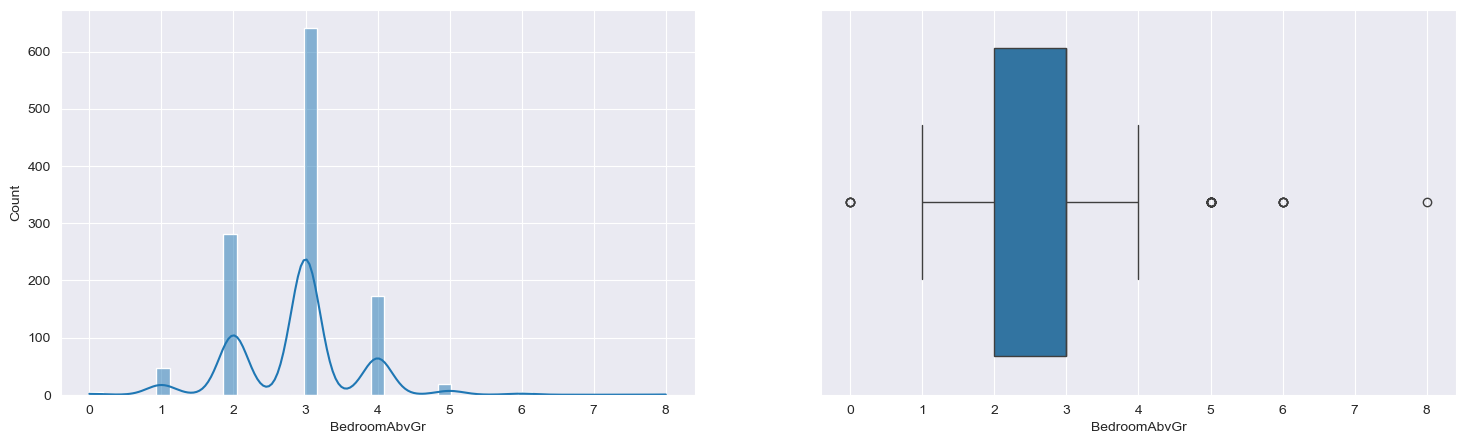

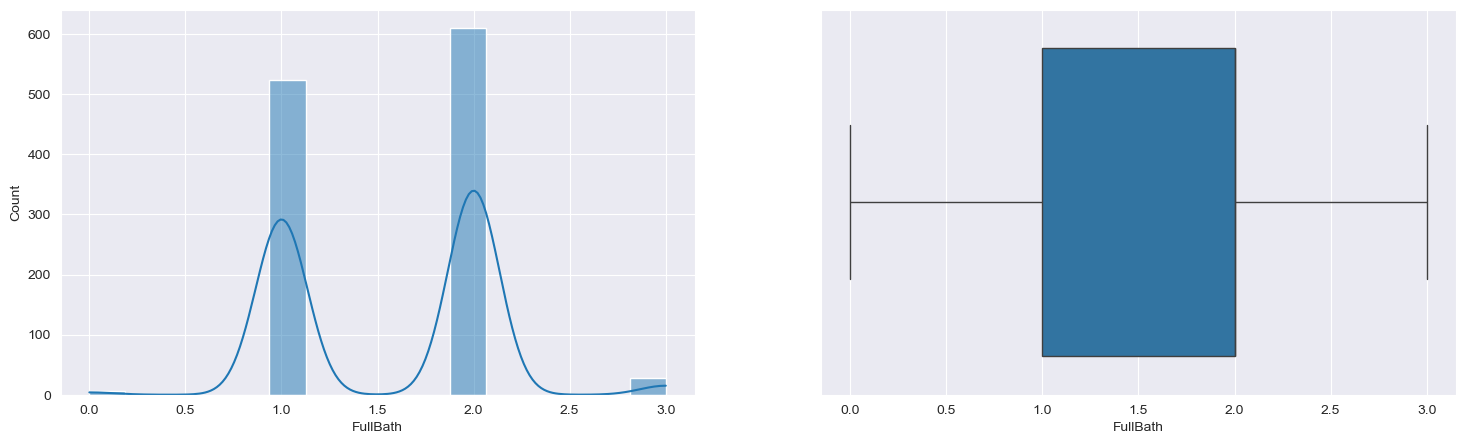

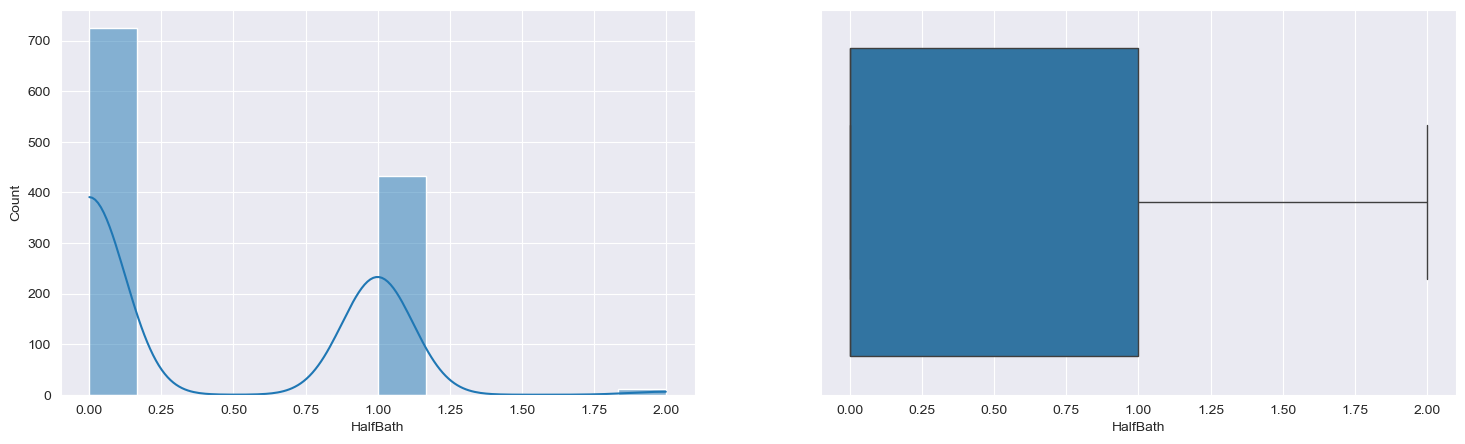

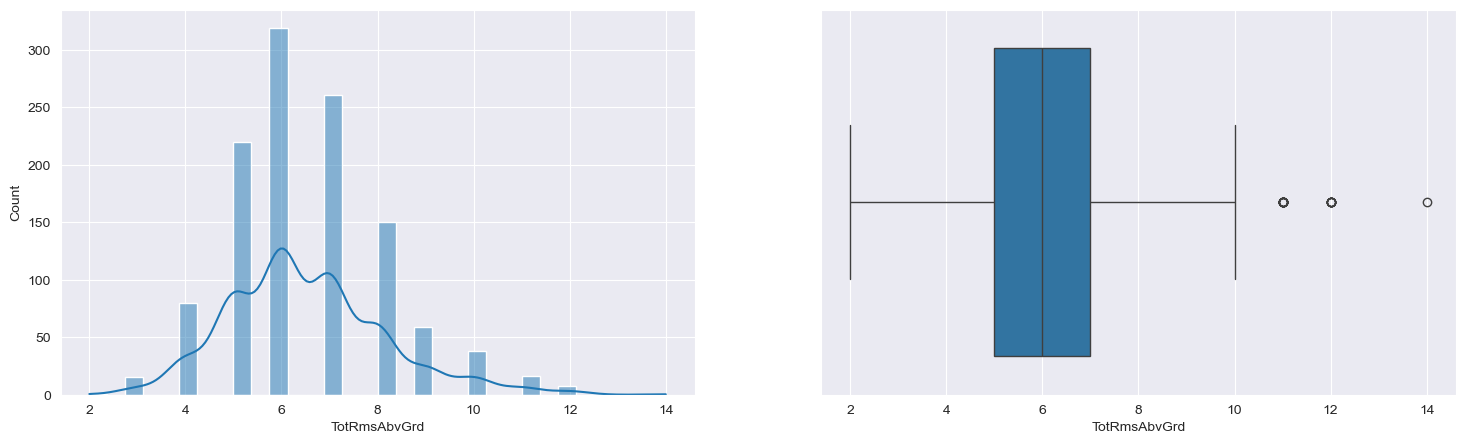

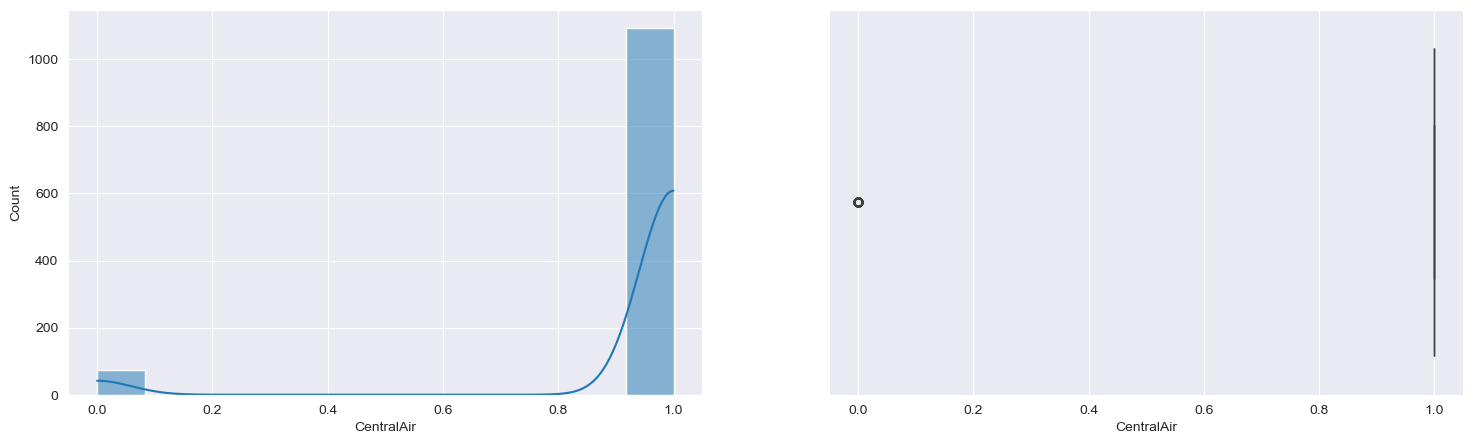

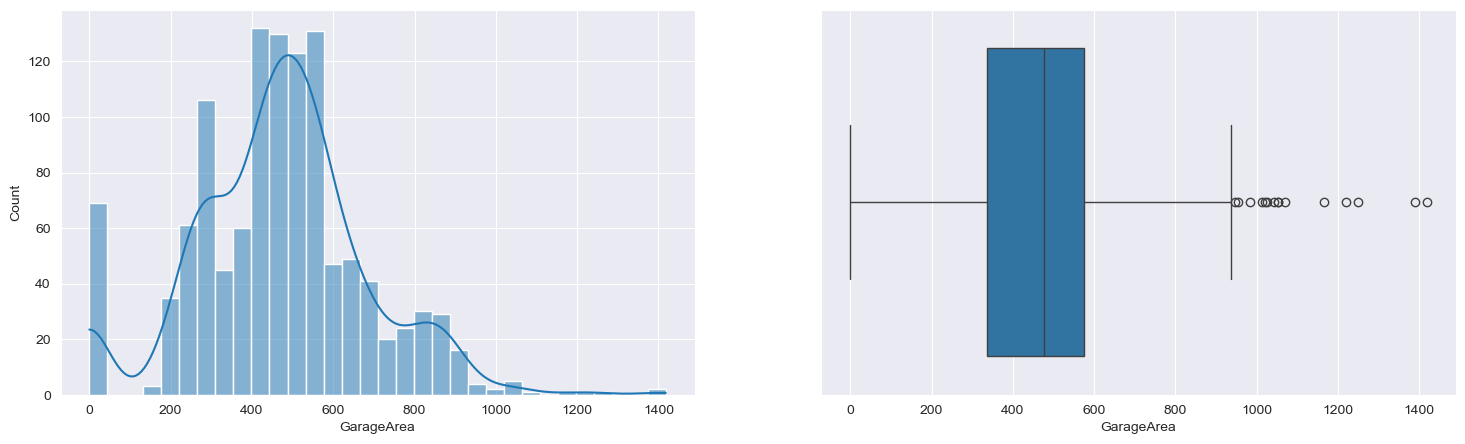

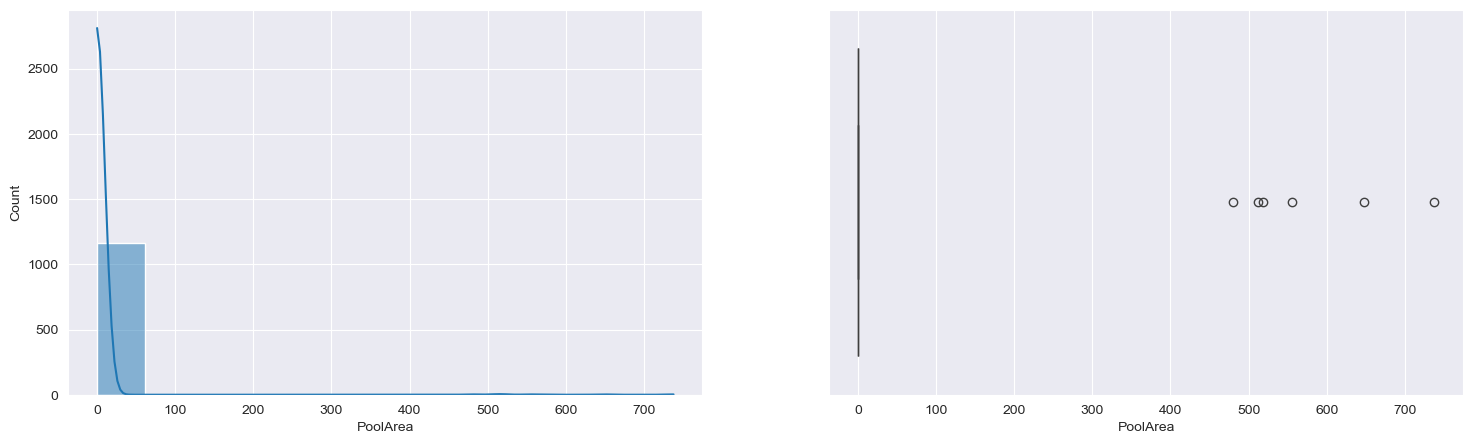

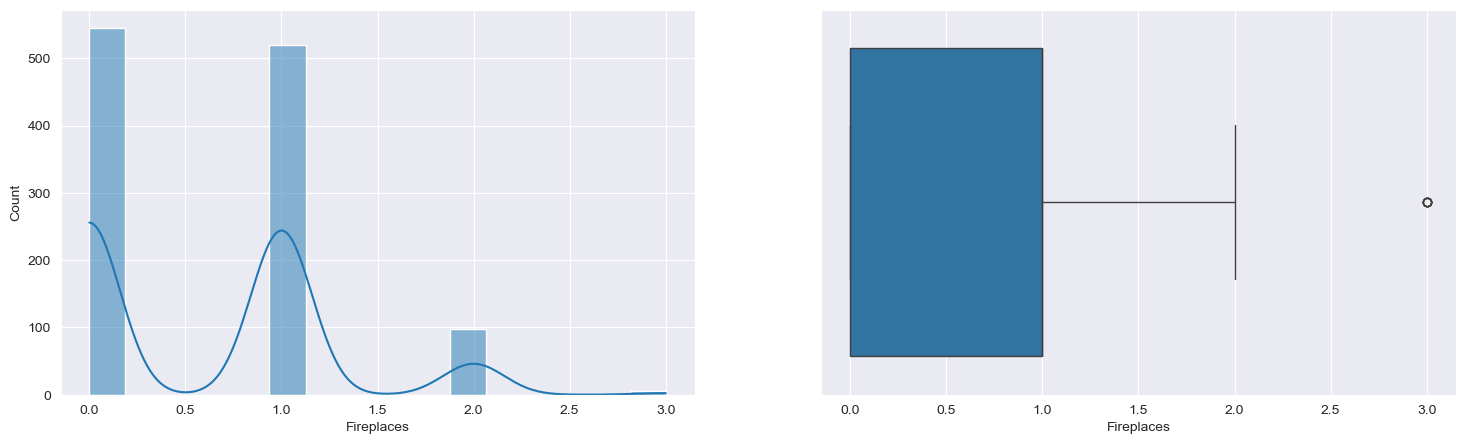

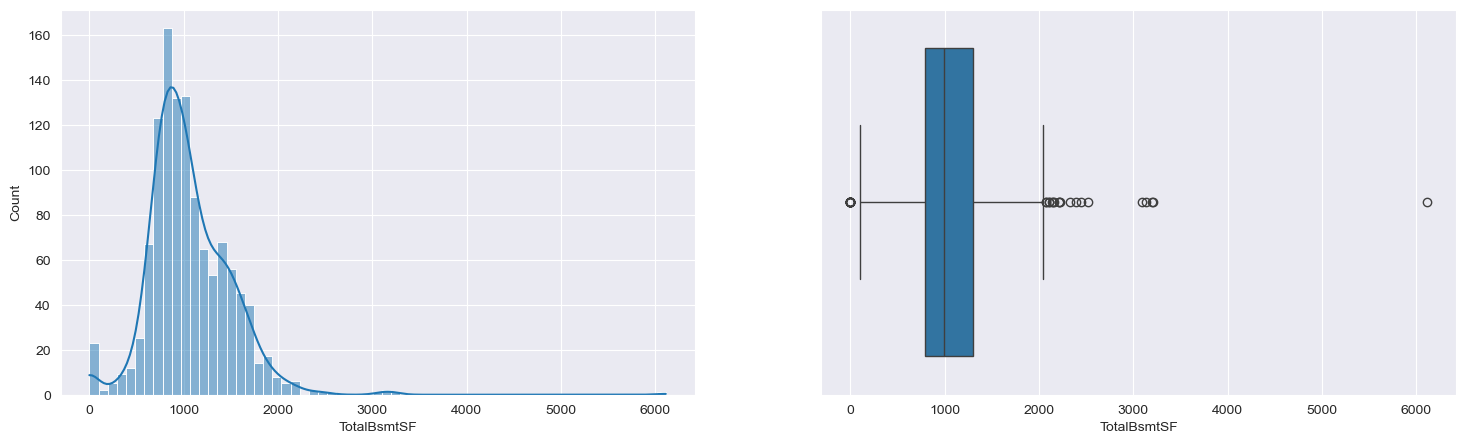

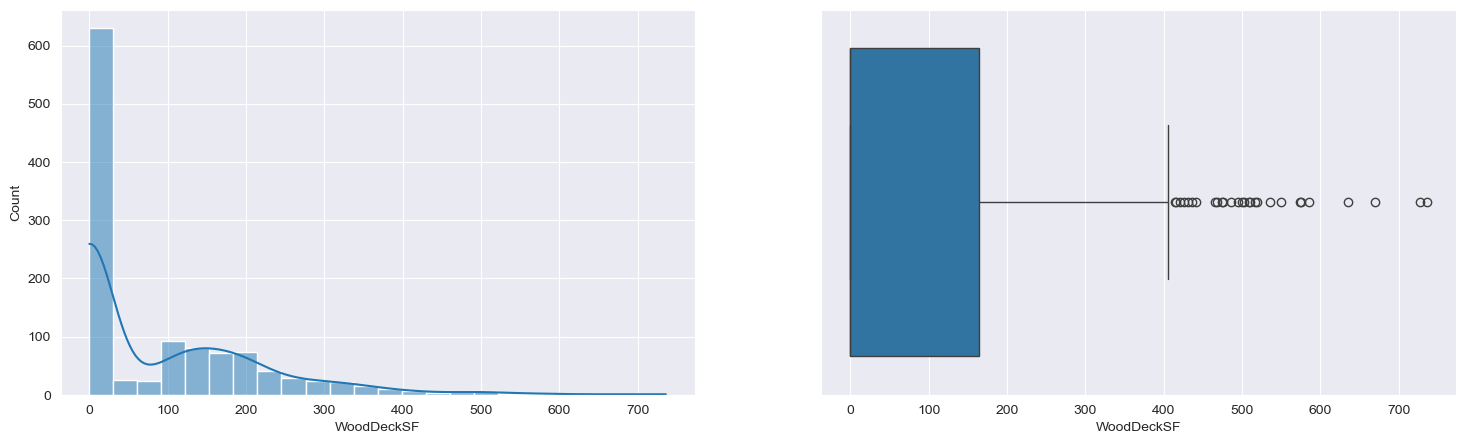

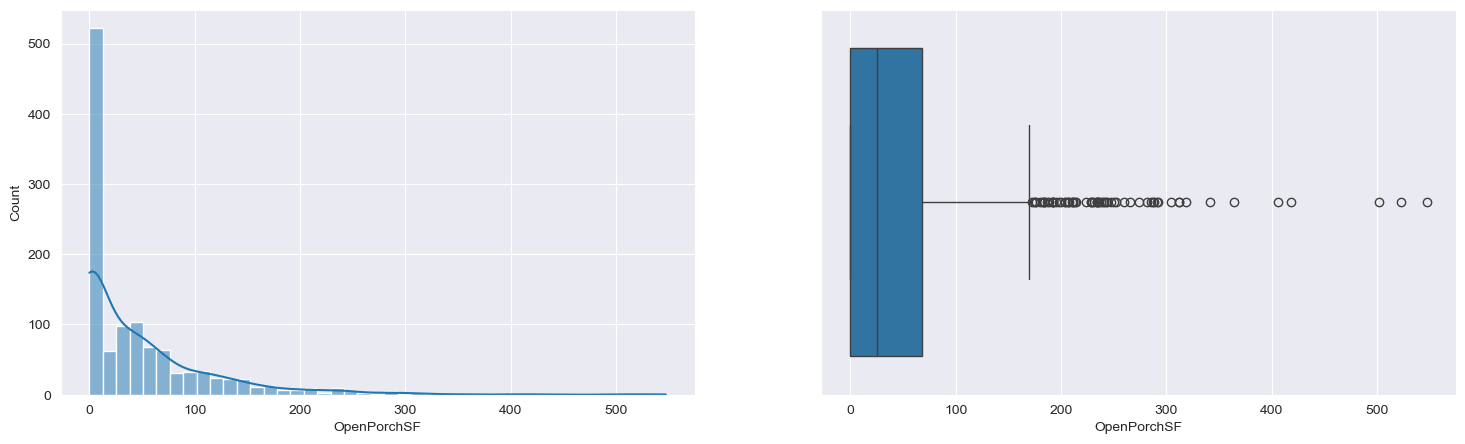

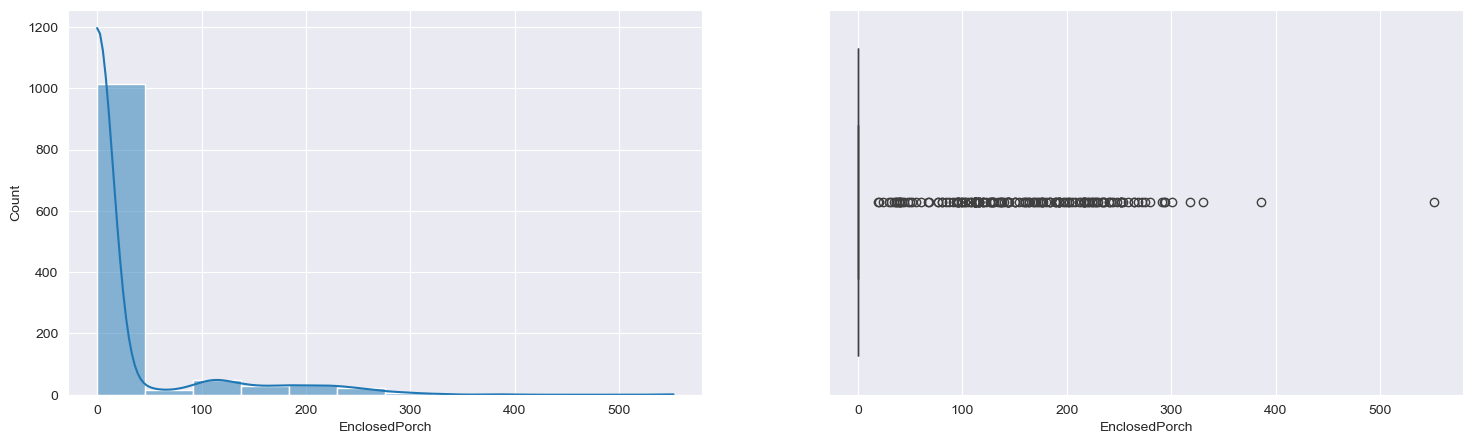

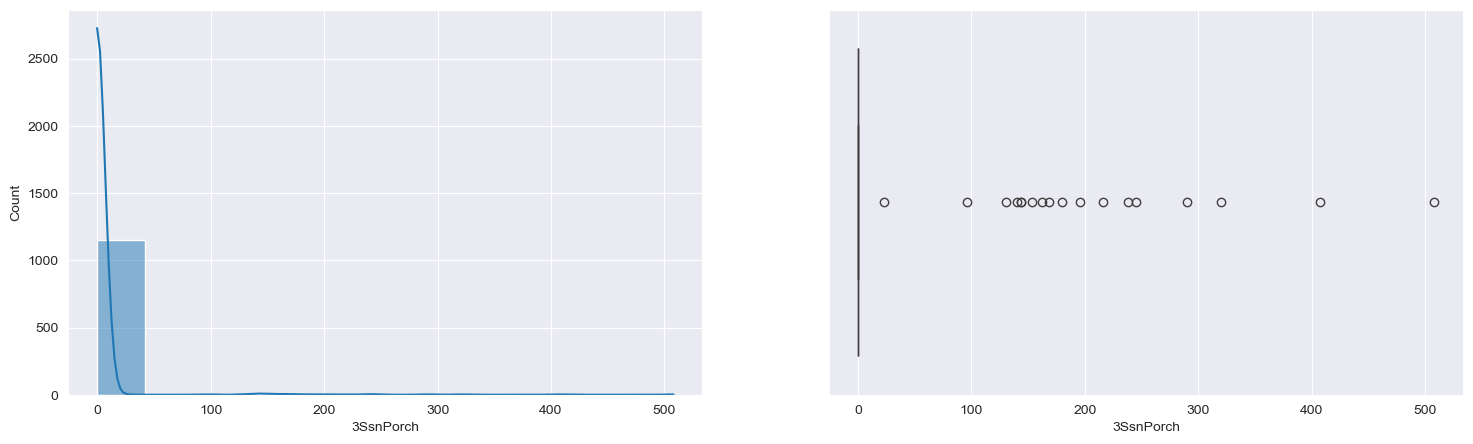

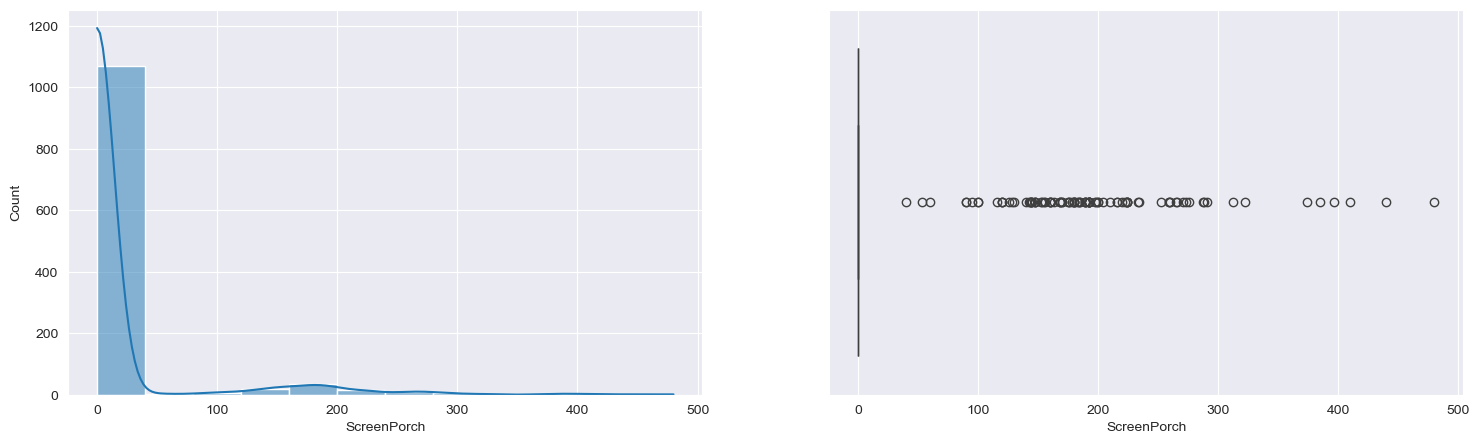

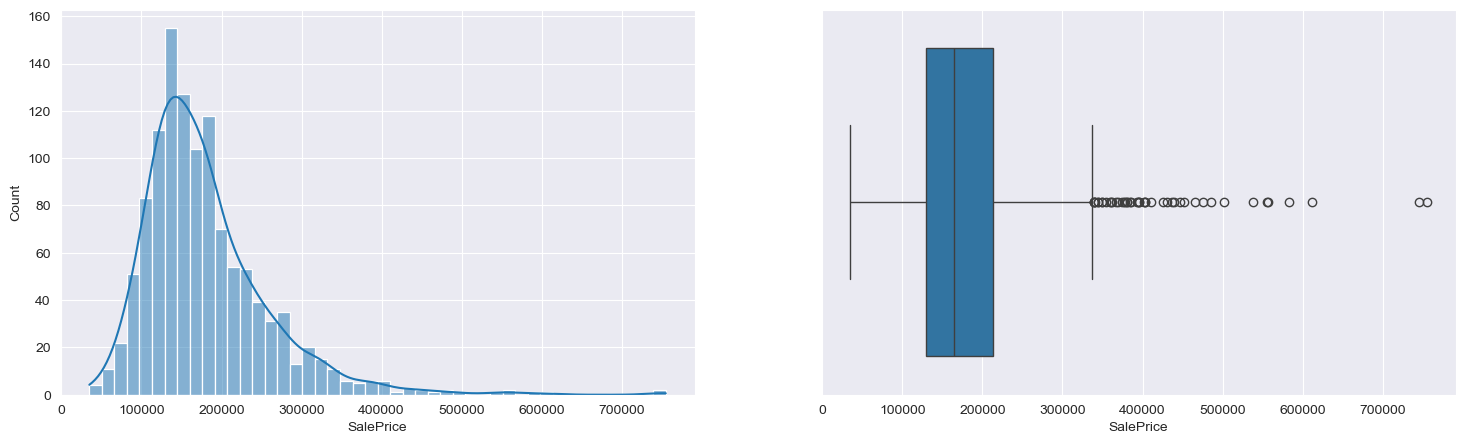

In [152]:
for col in colunas_numericas:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(train[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=train)
    plt.show()

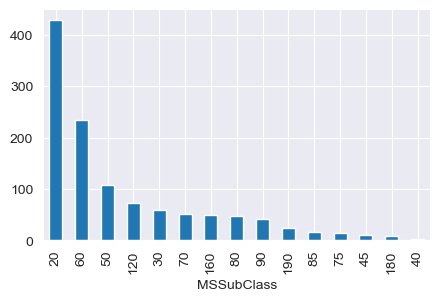

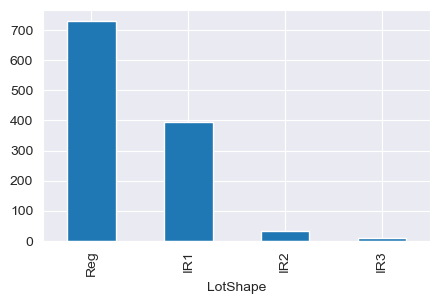

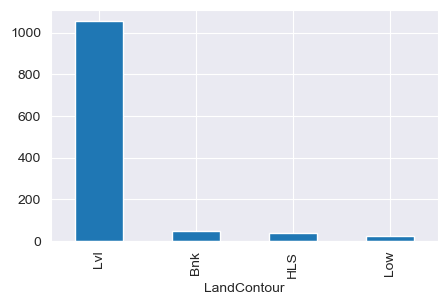

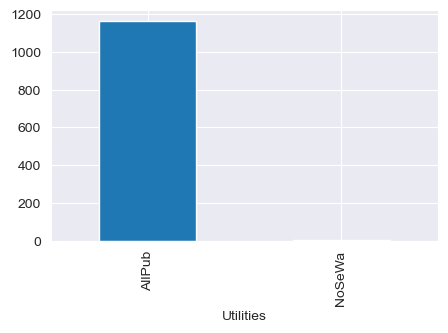

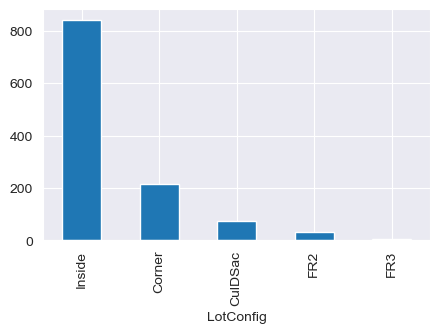

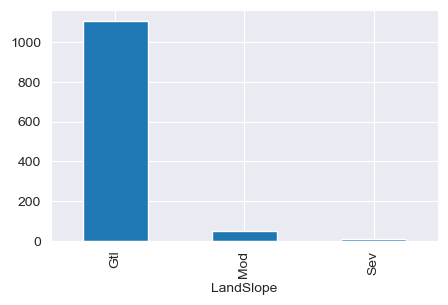

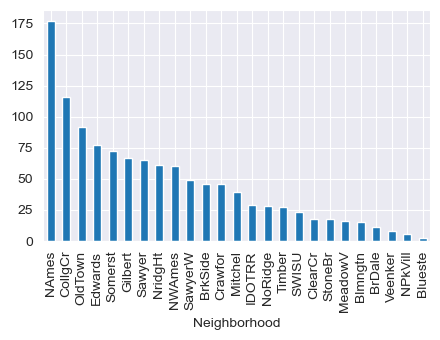

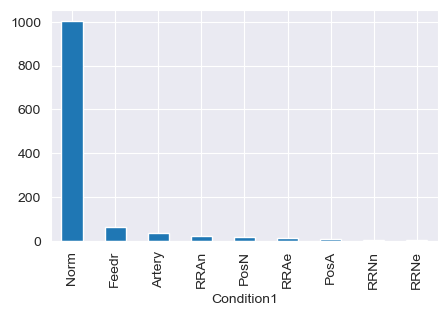

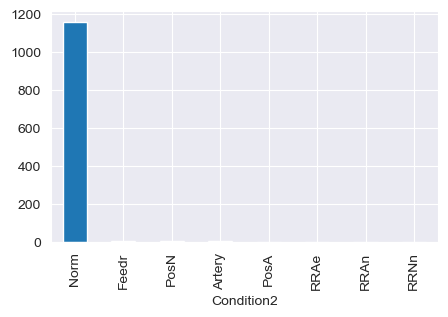

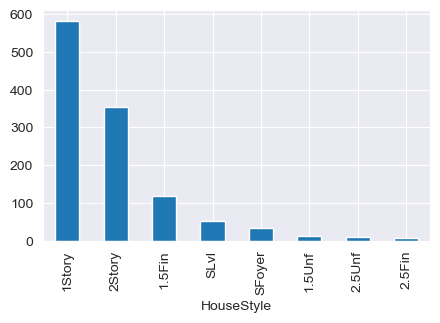

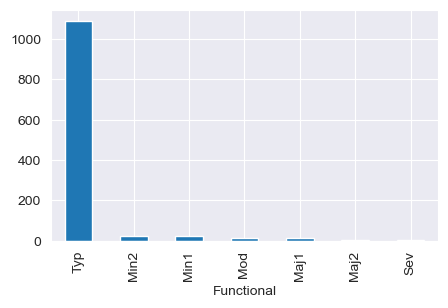

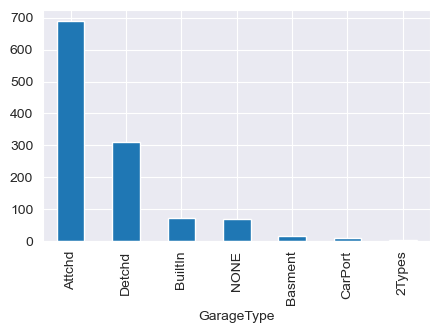

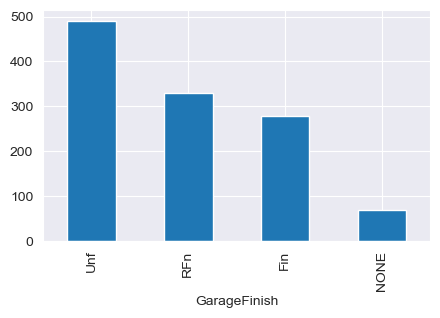

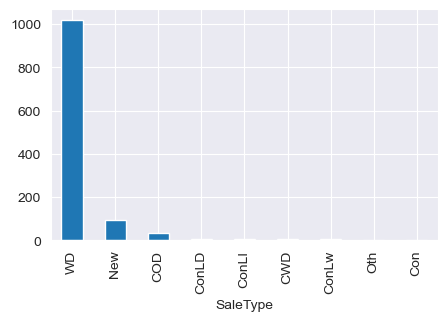

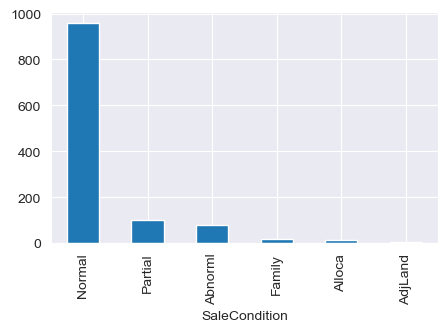

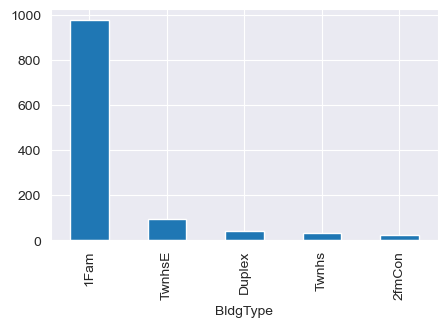

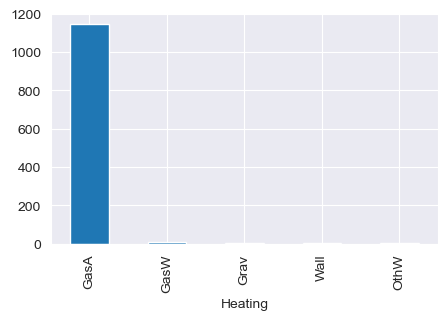

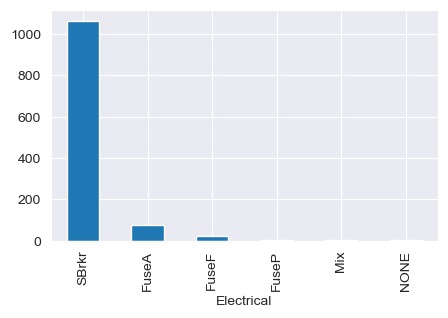

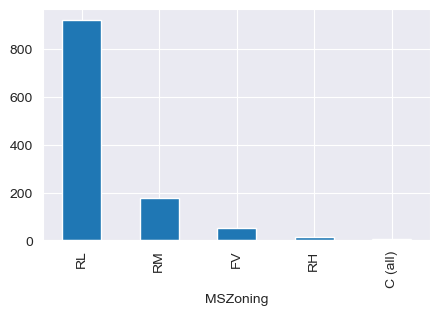

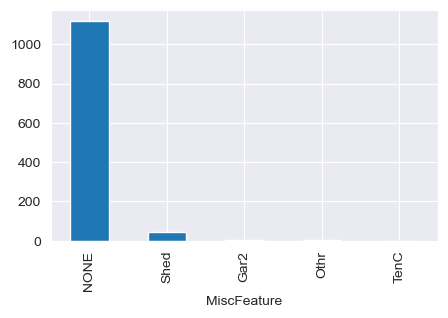

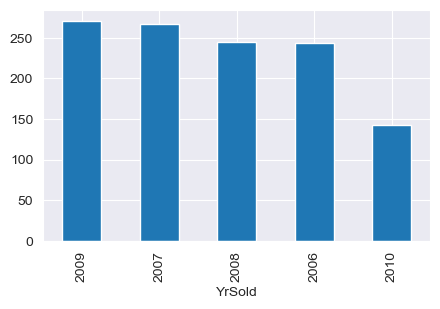

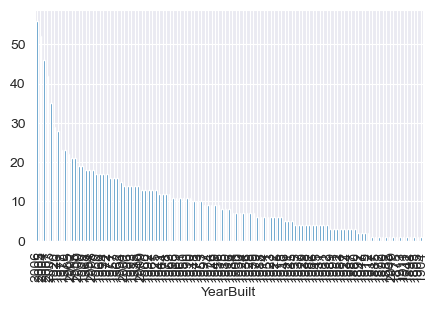

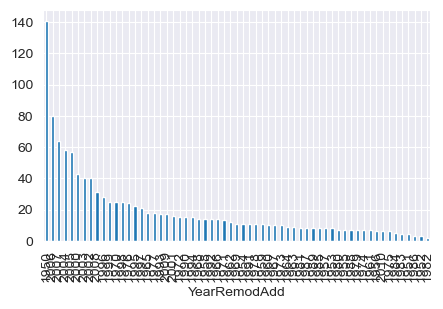

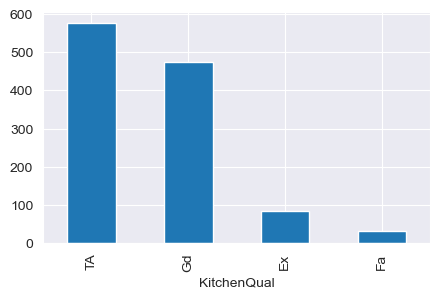

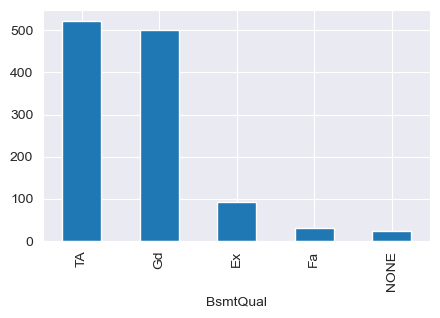

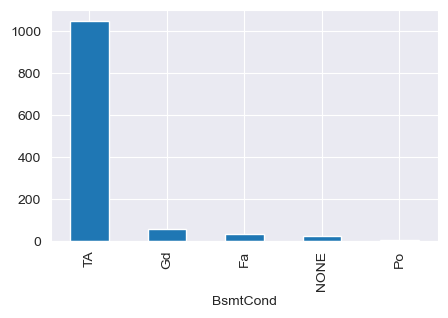

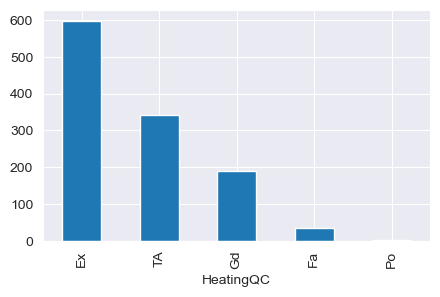

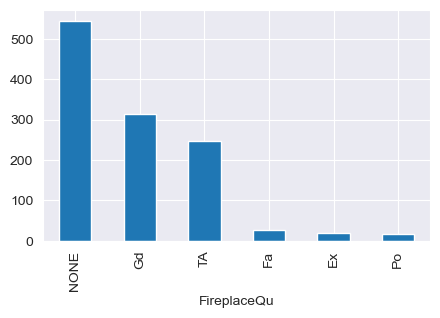

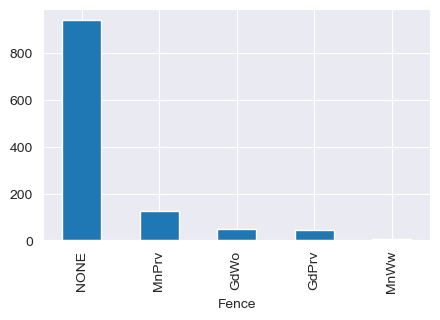

In [153]:
#Variaveis nominais
for col in categoricas_nominais:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()



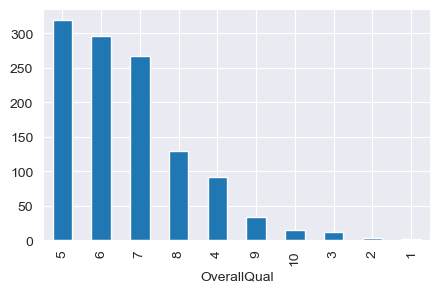

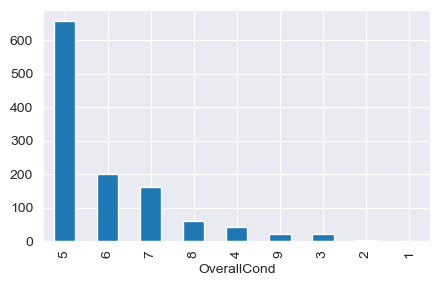

In [154]:
#Variaveis nominais
for col in categoricas_ordinais1:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()


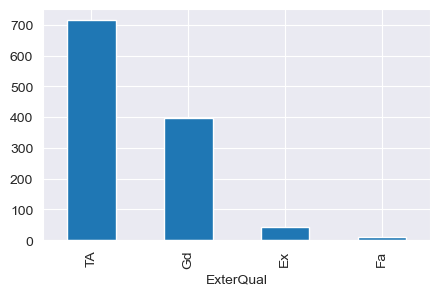

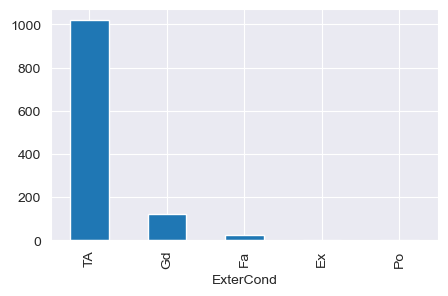

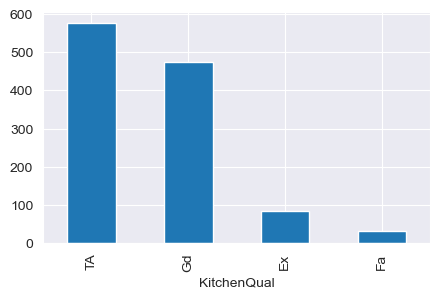

In [155]:
for col in categoricas_ordinais2:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()


#### Análise bivaliada

<Figure size 1000x1000 with 0 Axes>

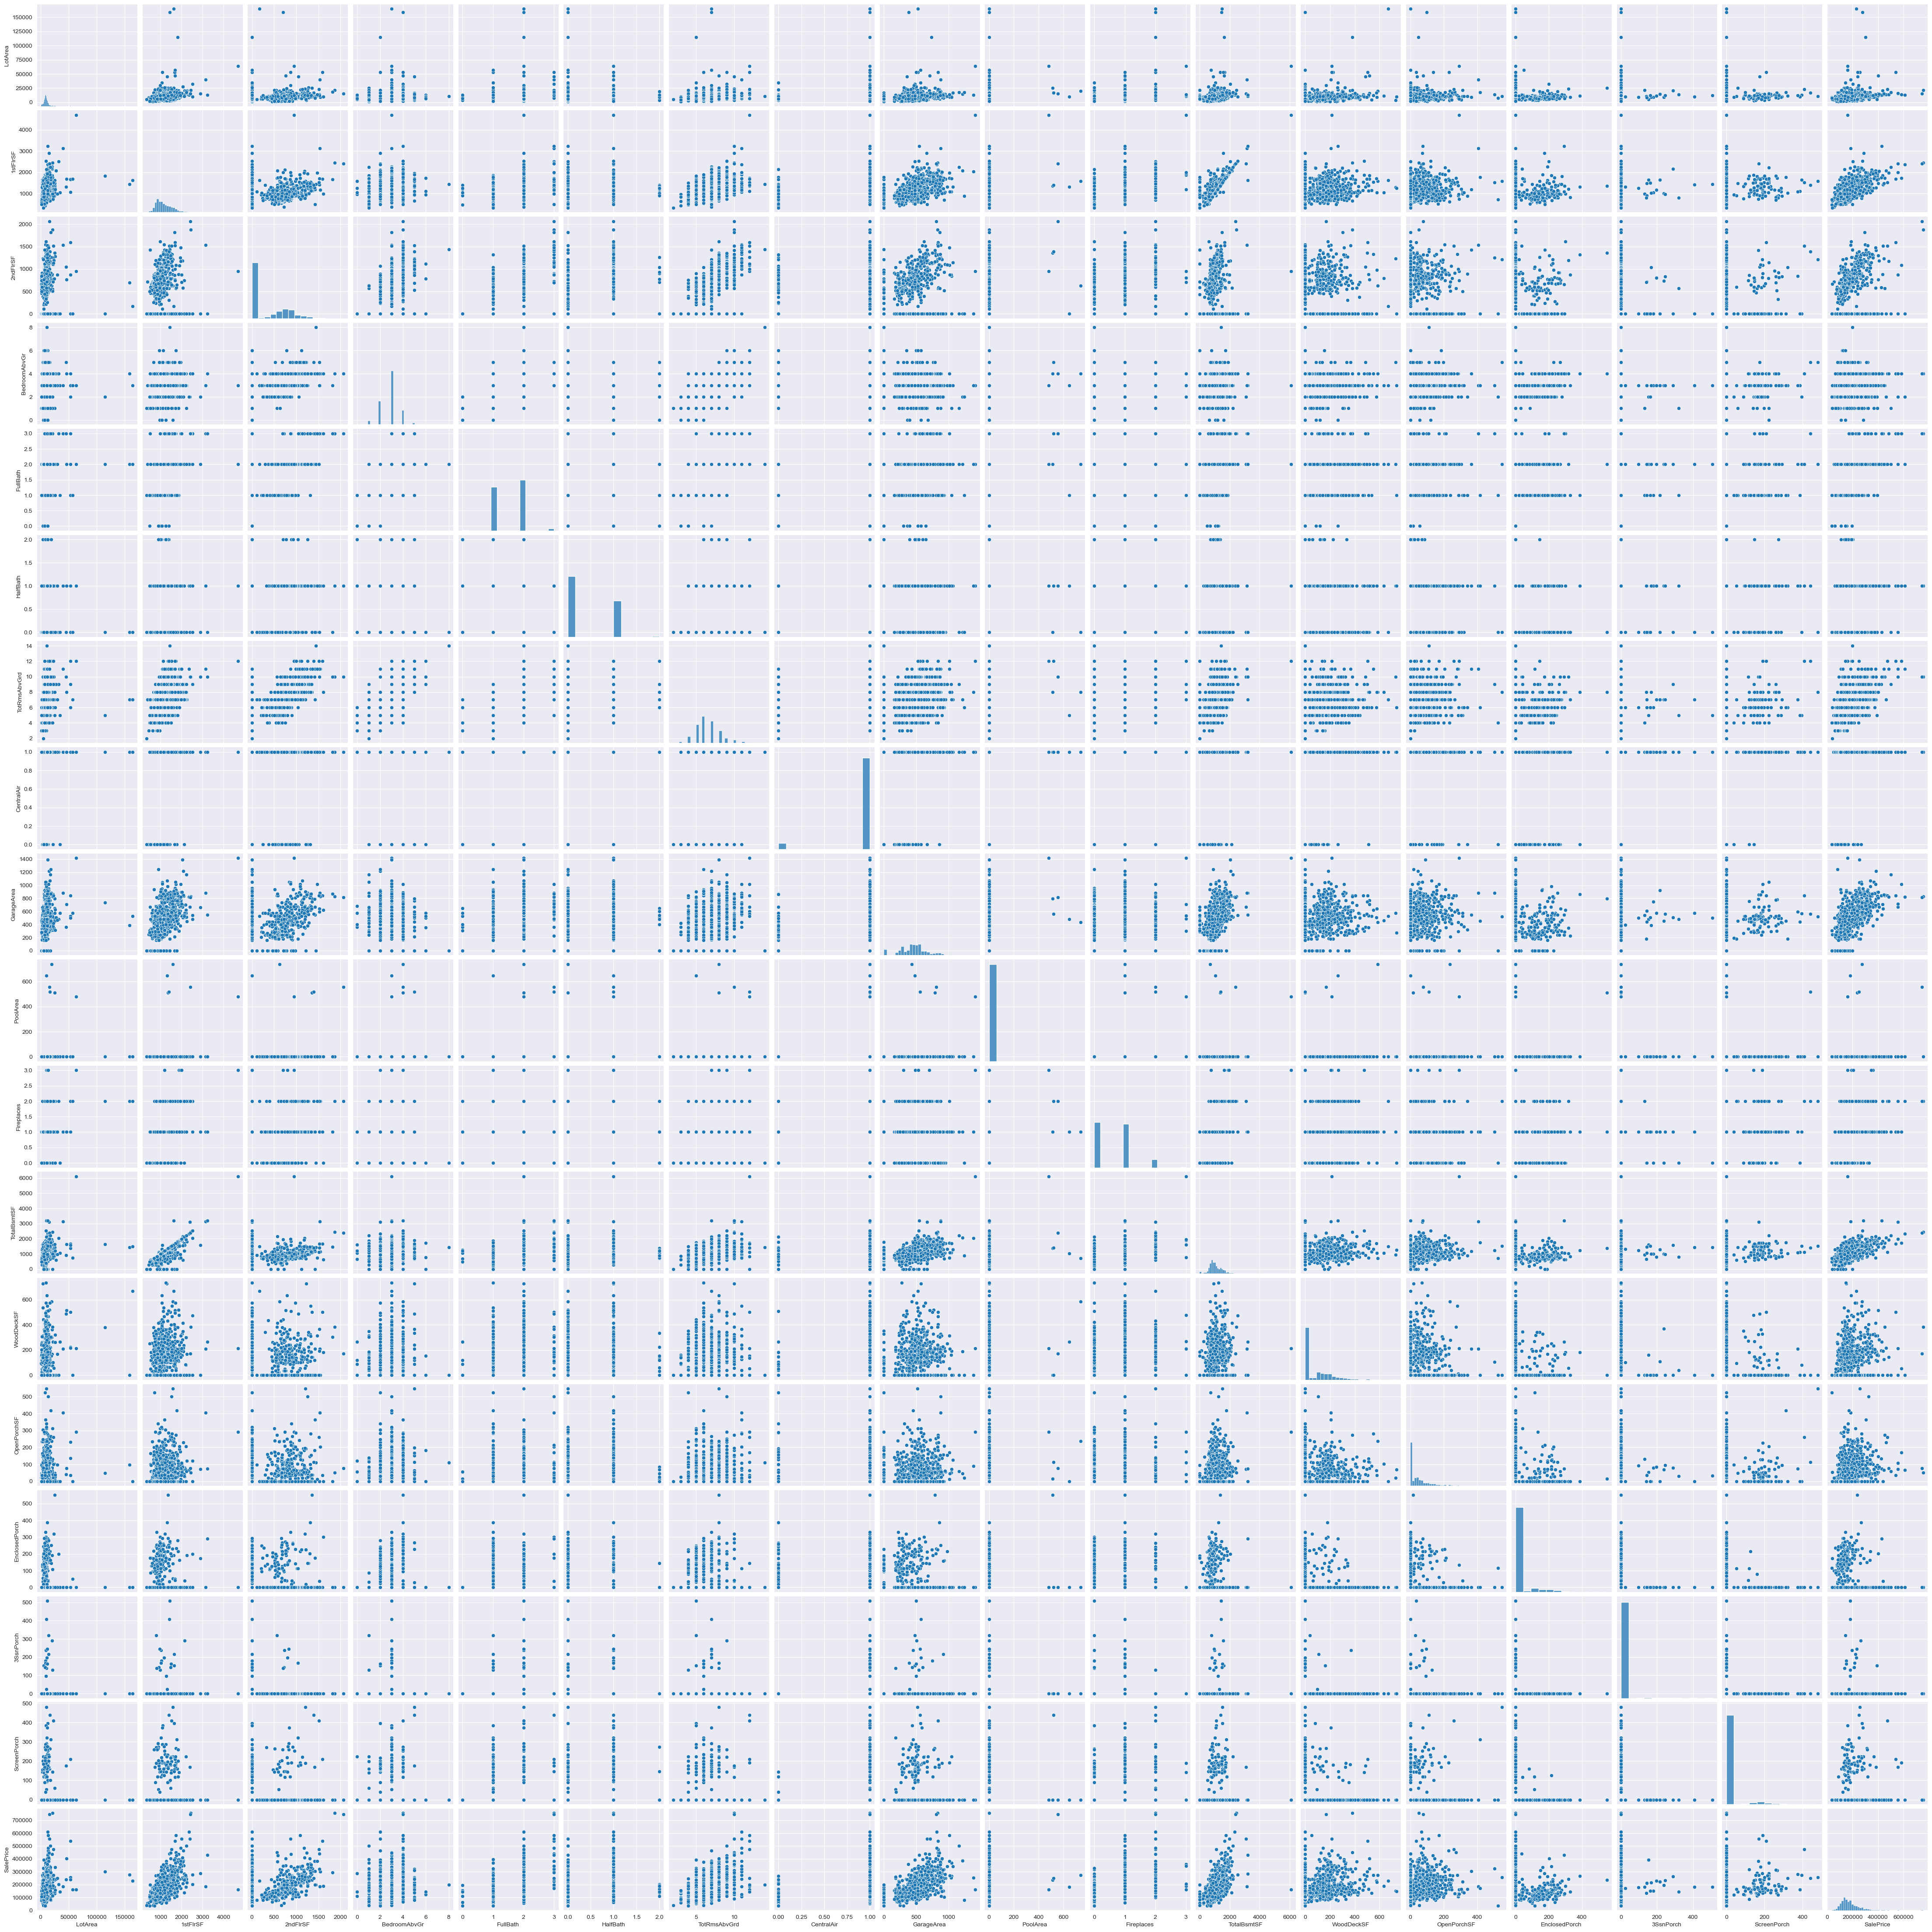

In [156]:
plt.figure(figsize=(10,10))
sns.pairplot(train[colunas_numericas].select_dtypes(include='number'))

<Axes: >

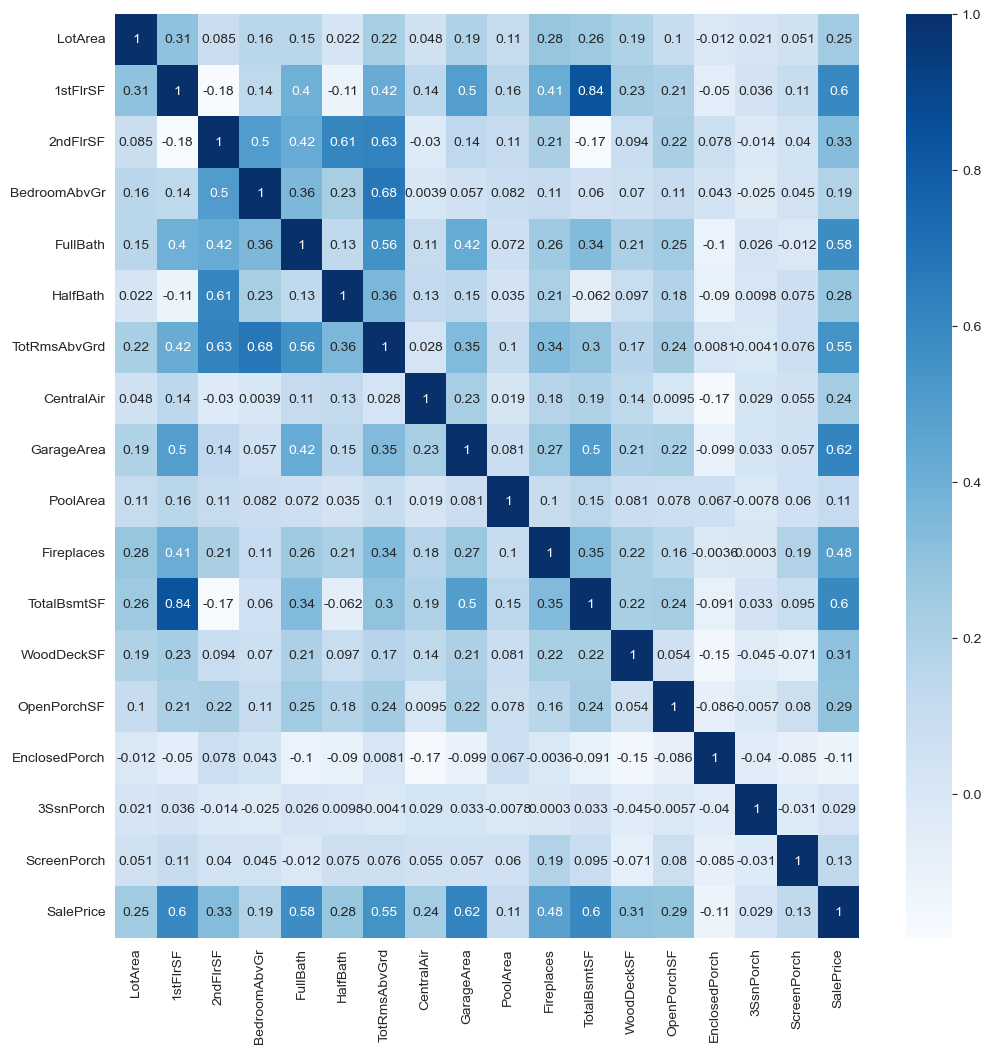

In [157]:
plt.figure(figsize=(12,12))
sns.heatmap(train[colunas_numericas].corr(), cbar=True, annot=True, cmap='Blues')

### Pre-processando variáveis

In [158]:
# codificando categoricas_ordinais1 da base treino
dados_ord1 = train[categoricas_ordinais1]
dados_ord1.index = range(1, len(train)+1)




In [159]:
dados_test_ord1 = test[categoricas_ordinais1]
dados_test_ord1.index = range(1, len(test)+1)

In [160]:
dados_test_ord1.shape

(292, 2)

In [161]:
print(dados_ord1.shape)


(1168, 2)


In [162]:
# codificando categoricas_ordinais2 da base treino
from sklearn.preprocessing import LabelEncoder

dados_ord2 = train[categoricas_ordinais2]

# Mapeamento da ordem correta
ordem_correta = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'NA': 5}

# Criando um objeto para transformar as colunas categóricas usando LabelEncoder
cat_encoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna categórica
for coluna in dados_ord2.columns:
    dados_ord2[coluna] = dados_ord2[coluna].map(ordem_correta)
    dados_ord2[coluna] = cat_encoder.fit_transform(dados_ord2[coluna])

dados_ord2.index = range(1, len(train)+1)



In [163]:
dados_test_ord2 = test[categoricas_ordinais2]
for coluna in dados_test_ord2.columns:
    dados_test_ord2[coluna] = dados_test_ord2[coluna].map(ordem_correta)
    dados_test_ord2[coluna] = cat_encoder.fit_transform(dados_test_ord2[coluna])

dados_test_ord2.index = range(1, len(test)+1)

In [164]:
print(dados_ord1.shape)


(1168, 2)


In [165]:
#Checking for wrong entries like symbols -,?,#,*,etc.
#for col in dados_nom.columns:
 #   print('{} : {}'.format(col, dados_nom[col].unique()))

In [166]:
#print(dados_nom.shape)
#print(dados_nom_test.shape)

In [167]:
'''def encontrar_colunas_diferentes(df1, df2):
    colunas_df1 = set(df1.columns)
    colunas_df2 = set(df2.columns)
    
    colunas_diferentes = colunas_df1.symmetric_difference(colunas_df2)
    
    return colunas_diferentes
colunas_diferentes = encontrar_colunas_diferentes(dados_nom, dados_nom_test)

print("Colunas diferentes nos dois DataFrames:")
print(colunas_diferentes)'''

'def encontrar_colunas_diferentes(df1, df2):\n    colunas_df1 = set(df1.columns)\n    colunas_df2 = set(df2.columns)\n    \n    colunas_diferentes = colunas_df1.symmetric_difference(colunas_df2)\n    \n    return colunas_diferentes\ncolunas_diferentes = encontrar_colunas_diferentes(dados_nom, dados_nom_test)\n\nprint("Colunas diferentes nos dois DataFrames:")\nprint(colunas_diferentes)'

In [168]:
'''colunas_diferentes'''

'colunas_diferentes'

In [169]:
train[colunas_numericas]

,LotArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,CentralAir,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,
968,7390,1098,0,3,1,0,6,1,260,0,0,1098,0,0,0,0,0,135000
739,10800,1200,0,3,3,0,5,1,0,0,0,1200,120,0,0,0,0,179000
696,13811,1137,0,2,2,0,5,1,551,0,1,1112,125,0,0,0,0,176000
239,12030,1694,0,3,2,0,7,1,818,0,0,1694,168,228,0,0,0,318000
891,8064,672,252,3,1,0,6,1,576,0,1,672,0,0,0,0,0,122900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,11426,1362,720,3,2,1,6,1,484,0,0,1362,280,238,0,0,0,200000
447,16492,1888,0,2,2,1,6,1,578,0,1,1517,0,0,0,0,0,190000
540,11423,1601,0,3,2,0,6,1,670,0,1,1581,180,0,0,0,0,272000


Padronizando as variáveis numéricas 

In [170]:
means = {}
std_devs = {}

# Função para calcular e armazenar a média e o desvio padrão
def calculate_mean_std(col):
    if col.name in ['int64', 'float64', 'int32']:
        means[col.name] = col.mean()
        std_devs[col.name] = col.std()
    return col

# Aplicar a função para calcular sem alterar os dados
train.apply(calculate_mean_std)

# Função para normalizar com base nos valores armazenados
def normalize_column_with_stored_values(col):
    if col.name in means and col.name in std_devs:
        return (col - means[col.name]) / std_devs[col.name]
    else:
        return col

In [171]:

# Normalizar os dados de treino
normalized_train = train.apply(normalize_column_with_stored_values)

# Suponha que `test` seja o seu DataFrame de teste
# Normalizar os dados de teste usando a mesma função
normalized_test = test.apply(normalize_column_with_stored_values)

In [172]:
# Standardizar
#treino
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data = train.apply(normalize_column)

#test
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data_test = test.apply(normalize_column)

# Viewing the resulting DataFrame
normalized_data.head()

,MSSubClass,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,Heating,Electrical,Utilities,CentralAir,YrSold,SaleType,SaleCondition,MSZoning,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,OverallQual,OverallCond,ExterQual,ExterCond,HouseStyle,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional,GarageType,GarageFinish,GarageArea,PoolArea,Fence,MiscFeature,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
968,20,-0.34,IR1,Lvl,Inside,Gtl,1Fam,-0.16,-0.79,0.16,-1.02,-0.77,-0.31,GasA,SBrkr,AllPub,0.26,0.13,WD,Normal,RL,NAmes,Norm,Norm,-0.53,-1.45,-0.81,1.25,TA,TA,1Story,TA,TA,TA,TA,NONE,Typ,Attchd,Unf,-0.98,-0.07,NONE,NONE,-0.96,0.09,-0.73,-0.70,-0.36,-0.11,-0.28,-0.57
739,90,0.05,Reg,Lvl,Inside,Gtl,Duplex,0.10,-0.79,0.16,2.60,-0.77,-0.92,GasA,SBrkr,AllPub,0.26,0.88,WD,Alloca,RL,Edwards,Norm,Norm,0.52,0.14,-0.81,-0.53,TA,TA,1Story,TA,Gd,Gd,TA,NONE,Typ,NONE,NONE,-2.20,-0.07,NONE,NONE,-0.96,0.32,0.23,-0.70,-0.36,-0.11,-0.28,-0.02
696,20,0.40,IR1,Lvl,Inside,Gtl,1Fam,-0.06,-0.79,-1.05,0.79,-0.77,-0.92,GasA,SBrkr,AllPub,0.26,-1.38,WD,Normal,RL,Timber,Norm,Norm,0.52,0.10,-0.08,0.36,TA,TA,1Story,Gd,Gd,Gd,Gd,TA,Typ,Attchd,Unf,0.38,-0.07,NONE,NONE,0.57,0.12,0.27,-0.70,-0.36,-0.11,-0.28,-0.05
239,20,0.19,Reg,Lvl,Inside,Gtl,1Fam,1.36,-0.79,0.16,0.79,-0.77,0.30,GasA,SBrkr,AllPub,0.26,-0.63,New,Partial,RL,NridgHt,Norm,Norm,1.18,1.06,1.38,-0.53,Ex,TA,1Story,Gd,Ex,TA,Ex,NONE,Typ,Attchd,Fin,1.63,-0.07,NONE,NONE,-0.96,1.44,0.62,2.64,-0.36,-0.11,-0.28,1.75
891,50,-0.26,Reg,Lvl,Corner,Gtl,1Fam,-1.25,-0.21,0.16,-1.02,-0.77,-0.31,GasA,SBrkr,AllPub,0.26,-0.63,WD,Normal,RL,NAmes,Artery,Norm,-0.73,1.01,-0.81,1.25,TA,Gd,1.5Fin,TA,TA,TA,Ex,Po,Typ,Detchd,Unf,0.50,-0.07,MnPrv,Shed,0.57,-0.88,-0.73,-0.70,-0.36,-0.11,-0.28,-0.73


In [173]:
print(normalized_data.shape)
print(normalized_data_test.shape)

(1168, 51)
(292, 51)


In [174]:

dados_numericos_padronizados = normalized_data.select_dtypes(exclude=['object'])

dados_numericos_padronizados_test = normalized_data_test.select_dtypes(exclude=['object'])


dados_numericos_padronizados.index = range(1, len(train)+1)
dados_numericos_padronizados_test.index = range(1, len(test)+1)


In [175]:
print(dados_numericos_padronizados.shape)
print(dados_numericos_padronizados_test.shape)

(1168, 23)
(292, 23)


In [115]:
# Juntando as tabelas

train = pd.concat([dados_numericos_padronizados, train_ohe, dados_ord1, dados_ord2], axis=1)

test = pd.concat([dados_numericos_padronizados_test, test_ohe, dados_test_ord1, dados_test_ord2], axis=1)


In [116]:
train.head()

,LotArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,CentralAir,YrSold,YearBuilt,YearRemodAdd,OverallQual,OverallCond,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,MSSubClass_20,MSSubClass_90,MSSubClass_50,MSSubClass_120,MSSubClass_60,MSSubClass_80,MSSubClass_160,MSSubClass_75,MSSubClass_70,MSSubClass_30,MSSubClass_85,MSSubClass_190,MSSubClass_45,MSSubClass_180,MSSubClass_40,LotArea,LotShape_IR1,LotShape_Reg,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Inside,LotConfig_Corner,LotConfig_FR2,...,HouseStyle_1.5Unf,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional_Typ,Functional_Maj1,Functional_Mod,Functional_Min2,Functional_Min1,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_NONE,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageFinish_Unf,GarageFinish_NONE,GarageFinish_Fin,GarageFinish_RFn,GarageArea,PoolArea,Fence,MiscFeature_NONE,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,Fence
1,-0.34,-0.16,-0.79,0.16,-1.02,-0.77,-0.31,0.26,0.13,-0.53,-1.45,-0.81,1.25,-0.98,-0.07,-0.96,0.09,-0.73,-0.70,-0.36,-0.11,-0.28,-0.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7390,1,0,0,0,1,0,0,0,1,0,0,...,0,TA,TA,TA,TA,NONE,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,260,0,NONE,1,0,0,0,0,0,1098,0,0,0,0,0,135000,5,7,2,2,2,1,2,2,5,0
2,0.05,0.10,-0.79,0.16,2.60,-0.77,-0.92,0.26,0.88,0.52,0.14,-0.81,-0.53,-2.20,-0.07,-0.96,0.32,0.23,-0.70,-0.36,-0.11,-0.28,-0.02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10800,0,1,0,0,1,0,0,0,1,0,0,...,0,TA,Gd,Gd,TA,NONE,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,NONE,1,0,0,0,0,0,1200,120,0,0,0,0,179000,5,5,2,2,1,0,2,2,5,0
3,0.40,-0.06,-0.79,-1.05,0.79,-0.77,-0.92,0.26,-1.38,0.52,0.10,-0.08,0.36,0.38,-0.07,0.57,0.12,0.27,-0.70,-0.36,-0.11,-0.28,-0.05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13811,1,0,0,0,1,0,0,0,1,0,0,...,0,Gd,Gd,Gd,Gd,TA,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,551,0,NONE,1,0,0,0,0,1,1112,125,0,0,0,0,176000,6,6,2,2,1,0,1,1,2,0
4,0.19,1.36,-0.79,0.16,0.79,-0.77,0.30,0.26,-0.63,1.18,1.06,1.38,-0.53,1.63,-0.07,-0.96,1.44,0.62,2.64,-0.36,-0.11,-0.28,1.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12030,0,1,0,0,1,0,0,0,1,0,0,...,0,Gd,Ex,TA,Ex,NONE,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,818,0,NONE,1,0,0,0,0,0,1694,168,228,0,0,0,318000,8,5,0,2,0,1,0,1,5,0
5,-0.26,-1.25,-0.21,0.16,-1.02,-0.77,-0.31,0.26,-0.63,-0.73,1.01,-0.81,1.25,0.50,-0.07,0.57,-0.88,-0.73,-0.70,-0.36,-0.11,-0.28,-0.73,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8064,0,1,0,0,1,0,0,0,0,1,0,...,0,TA,TA,TA,Ex,Po,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,576,0,MnPrv,0,1,0,0,0,1,672,0,0,0,0,0,122900,5,7,2,1,2,1,0,2,4,0


In [117]:
# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1168, 380)
Test dataset shape: (292, 380)


In [118]:
#train= train.drop(columns="MSSubClass")
#test= test.drop(columns="MSSubClass")

In [123]:
test.head()

,LotArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,CentralAir,YrSold,YearBuilt,YearRemodAdd,OverallQual,OverallCond,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,MSSubClass_20,MSSubClass_90,MSSubClass_50,MSSubClass_120,MSSubClass_60,MSSubClass_80,MSSubClass_160,MSSubClass_75,MSSubClass_70,MSSubClass_30,MSSubClass_85,MSSubClass_190,MSSubClass_45,MSSubClass_180,MSSubClass_40,LotArea,LotShape_IR1,LotShape_Reg,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Inside,LotConfig_Corner,LotConfig_FR2,...,HouseStyle_1.5Unf,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional_Typ,Functional_Maj1,Functional_Mod,Functional_Min2,Functional_Min1,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_NONE,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageFinish_Unf,GarageFinish_NONE,GarageFinish_Fin,GarageFinish_RFn,GarageArea,PoolArea,Fence,MiscFeature_NONE,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,Fence
1,0.35,0.37,1.77,1.45,0.78,1.31,1.56,0.27,-1.30,0.66,0.38,1.35,-0.47,-0.11,-0.06,0.73,0.55,0.15,0.68,-0.36,-0.14,-0.24,0.93,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16059,0,1,0,0,1,0,0,0,0,1,0,...,0,Gd,Gd,TA,Ex,TA,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,462,0,NONE,1,0,0,0,0,1,1288,127,82,0,0,0,260000,8,5,1,1,1,1,0,1,2,0
2,-0.09,0.13,2.21,1.45,0.78,1.31,1.56,0.27,-0.56,0.79,0.53,0.65,-0.47,1.10,-0.06,0.73,0.36,0.89,1.23,-0.36,-0.14,-0.24,1.30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9950,1,0,0,0,1,0,0,0,1,0,0,...,0,Gd,Gd,TA,Ex,TA,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,721,0,NONE,1,0,0,0,0,1,1203,224,114,0,0,0,290000,7,5,1,1,1,1,0,1,2,0
3,-0.13,-0.58,0.62,0.17,-1.05,-0.74,-0.98,0.27,-1.30,-1.03,-1.67,-0.05,1.43,-1.14,-0.06,2.38,-0.55,-0.82,-0.75,0.25,-0.14,-0.24,-0.62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9490,0,1,0,0,1,0,0,0,1,0,0,...,0,Fa,TA,TA,TA,TA,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,240,0,MnPrv,1,0,0,0,0,2,806,0,0,32,0,0,133000,6,7,2,1,2,1,2,3,2,0
4,-0.07,-0.73,1.05,0.17,0.78,-0.74,1.56,0.27,1.67,-1.71,-1.67,0.65,0.48,-0.02,-0.06,-0.93,-1.08,-0.73,-0.56,0.86,-0.14,-0.24,-0.54,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10300,1,0,0,0,0,1,0,0,1,0,0,...,0,TA,TA,TA,Gd,NONE,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,480,0,GdPrv,1,0,0,0,0,0,576,12,11,64,0,0,140000,7,6,2,1,2,1,1,2,5,0
5,-0.20,-0.92,0.07,-1.12,-1.05,-0.74,-0.35,0.27,0.18,-0.83,-1.67,-0.75,-0.47,-0.70,-0.06,-0.93,-0.49,0.39,-0.75,1.58,-0.14,-0.24,-0.80,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8480,0,1,0,0,1,0,0,0,1,0,0,...,0,TA,TA,TA,TA,NONE,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,336,0,NONE,1,0,0,0,0,0,832,158,0,102,0,0,118500,5,5,2,1,2,1,2,2,5,0


Vamos fazer o test VIF, para isso, vamos separar uma base de dados sem as variáveis dummies e sem a variável alvo

In [177]:
df_first_19 = train.iloc[:, :22].copy()
df_last_10 = train.iloc[:, -10:].copy()

save_my_sale = train.iloc[:, 22].copy()

#my_template = train
train_SD = pd.concat([df_first_19, df_last_10], axis=1)

In [178]:
print(save_my_sale)
#print(dados)


Id
968      Norm
739      Norm
696      Norm
239      Norm
891    Artery
        ...  
184      Norm
447      PosA
540      Norm
641      Norm
609      Norm
Name: Condition1, Length: 1168, dtype: object


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_vars = train_SD

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]


In [ ]:
#print(vif_data)

In [ ]:
max_value = vif_data['VIF'].max()

print(f"The maximum value in the column is: {max_value}")

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 968 to 609
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1168 non-null   object
 1   LotArea        1168 non-null   int64 
 2   LotShape       1168 non-null   object
 3   LandContour    1168 non-null   object
 4   LotConfig      1168 non-null   object
 5   LandSlope      1168 non-null   object
 6   BldgType       1168 non-null   object
 7   1stFlrSF       1168 non-null   int64 
 8   2ndFlrSF       1168 non-null   int64 
 9   BedroomAbvGr   1168 non-null   int64 
 10  FullBath       1168 non-null   int64 
 11  HalfBath       1168 non-null   int64 
 12  TotRmsAbvGrd   1168 non-null   int64 
 13  Heating        1168 non-null   object
 14  Electrical     1168 non-null   object
 15  Utilities      1168 non-null   object
 16  CentralAir     1168 non-null   int64 
 17  YrSold         1168 non-null   int64 
 18  SaleType       1168 non-null   o

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'train' is your DataFrame containing predictor variables initially
independent_vars = train_SD.copy()  # Make a copy to avoid modifying the original DataFrame

high_vif_variables = pd.DataFrame({'Variable': [], 'VIF': []})

while True:
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_vars.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

    high_vif_variables = vif_data[vif_data['VIF'] > 2]

    if high_vif_variables.empty:
        break

    variable_to_drop = high_vif_variables.loc[high_vif_variables['VIF'].idxmax(), 'Variable']

    independent_vars.drop(variable_to_drop, axis=1, inplace=True)

print("Variables after dropping high VIF variables:")
print(independent_vars.columns)


In [ ]:
column_names2 = independent_vars.columns.tolist()

# Printing the column names
print(column_names2)

In [ ]:
independent_vars.head()

In [ ]:
#excluindo Fence
dados2 = independent_vars.iloc[:, :-1]
dados2.head()

In [ ]:
#Juntando as variáveis selecionadas pelo VIF com as dummies
dados1 = train[dummy_names]
#dados2 = train[column_names2]


In [ ]:
dados3 = pd.concat([dados2, dados1], axis=1)
#dados3 = pd.concat([dados2], axis=1)
dados3.head()

In [ ]:
dados3.shape

In [ ]:
my_df = pd.DataFrame(save_my_sale)
my_df.head()

In [ ]:
#Juntando a variável alvo com a base
dados3 = pd.concat([dados3, my_df], axis=1)

In [ ]:
dados3.head()

In [ ]:
dados3.tail()

In [ ]:
#Verificar se ficol algum valor ausente
columns_with_nan = dados3.columns[dados3.isnull().any()].tolist()

print("Columns containing NaN values:")
print(columns_with_nan)

In [ ]:
#redefinando o nome train para a base de treino com as variáveis selecionadas
train = dados3  # Filter rows where 'id' is from 1 to 1460

# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

#### Vamos fazer uma seleção de variáveis com o modelo lasso

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Separar variáveis independentes (X) e variável dependente (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Ajustar um modelo Lasso
lasso = Lasso(alpha=0.02)  # O valor de alpha controla a força da penalidade L
lasso.fit(X_train, y_train)

# Verificar os coeficientes não nulos (variáveis selecionadas)
variaveis_selecionadas = X.columns[lasso.coef_ != 0]

# Exibir as variáveis selecionadas
print("Variáveis selecionadas pelo Lasso:", variaveis_selecionadas)


# Modelo

In [ ]:
# Separando a variável dependente e independnte
#X_train = train.drop('SalePrice', axis=1)

X_train = train[variaveis_selecionadas]
y_train = train['SalePrice']

In [ ]:
colunas_treino = X_train.columns
colunas_treino

In [ ]:

X_test = test[colunas_treino]
#X_test = test[variaveis_selecionadas]
#y_test = test['SalePrice']  # Variável dependente


In [ ]:
print(X_test.shape)
print(X_train.shape)

Vamos usar a base de treino para treinar e avaliar o modelo. No final usaremos a base de teste para previsão. Chamaremos a base X_teste de Xproducao, para evitar confusão com o teste do treinamento

In [ ]:
X_producao = X_test

In [ ]:
from sklearn.model_selection import train_test_split

# Supondo que `X` são suas features e `y` é o target
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

# Rede Neural Sem Cross Validation

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializando e treinando o MLPRegressor
ANN = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2023)
ANN.fit(X_train, y_train)

# Fazendo previsões
y_pred = ANN.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
# Calculando o R² ajustado
n = X_test.shape[0]  # Número de observações no conjunto de teste
p = X_test.shape[1]  # Número de preditores (excluindo o intercepto)
r2_ajustado = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'R² ajustado do melhor modelo no conjunto de teste: {r2_ajustado}')

# Com Cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# Definindo o modelo
mlp = MLPRegressor(max_iter=100)

# Definindo os hiperparâmetros para teste
parameter_space = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Usando r2_score como a métrica de avaliação
scorer = make_scorer(r2_score)

# Configurando GridSearchCV
grid_search = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring=scorer)

# Fit no modelo (isso pode demorar um pouco dependendo do número de combinações)
grid_search.fit(X_train, y_train)

# Melhor parâmetro encontrado
print("Melhor conjunto de parâmetros:")
print(grid_search.best_params_)

# Melhor modelo
best_model = grid_search.best_estimator_

# Avaliando o melhor modelo no conjunto de teste
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² do melhor modelo no conjunto de teste: {r2}')
# Calculando o R² ajustado
n = X_test.shape[0]  # Número de observações no conjunto de teste
p = X_test.shape[1]  # Número de preditores (excluindo o intercepto)
r2_ajustado = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'R² ajustado do melhor modelo no conjunto de teste: {r2_ajustado}')


In [ ]:
import pickle
# Salvando o modelo em um arquivo pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.4f}')
# Calculando o R² ajustado
n = X_test.shape[0]  # Número de observações no conjunto de teste
p = X_test.shape[1]  # Número de preditores (excluindo o intercepto)
r2_ajustado = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'R² ajustado do melhor modelo no conjunto de teste: {r2_ajustado}')